Food Mart (CFM) is a chain of convenience stores in the United States. The private company's headquarters are located in Mentor, Ohio, and currently, approximately 325 stores are located in the US. Convenient Food Mart operates on the franchise basis.

There are 15 independent variables (including id):

- store_sales: Store sales in millions.
- unit_sales: Quantity of units sold.
- total_children: Total children in home.
- num_children_at_home: Total children at home as per customer filled details.
- avg_cars_at_home: Average cars at home.
- gross_weight: Gross weight of an item.
- recyclable_package: If the package of the food item is recycleble 1 or not 0.
- low_fat: If an item is a low fat 1 or not 0.
- units_per_case: Units/case units available in each store shelves.
- store_sqft: Store area available in sqft.
- coffee_bar: If a store has a coffee bar available 1 or not 0.
- video_store: If a video store/gaming store is available 1 or not 0.
- salad_bar: if a salad bar is available in a store 1 or not 0.
- prepared_food: if a prepared food is available in a store 1 or not 0.
- florist: if flower shelves are available in a store 1 or not 0.
 
Target variable:

- cost:  Cost on acquiring a customers in dollars.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.metrics import mean_squared_log_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

%matplotlib inline

In [2]:
train_df = pd.read_csv(r'train.csv')
train_df.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [3]:
test_df = pd.read_csv(r'test.csv')
test_df.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
1,360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0
2,360338,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0
3,360339,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0
4,360340,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0


In [4]:
#checking for null
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

In [5]:
train_df.shape

(360336, 17)

In [6]:
test_df.shape

(240224, 16)

In [7]:
train_df.nunique()

id                            360336
store_sales(in millions)        1044
unit_sales(in millions)            6
total_children                     6
num_children_at_home               6
avg_cars_at home(approx).1         5
gross_weight                     384
recyclable_package                 2
low_fat                            2
units_per_case                    36
store_sqft                        20
coffee_bar                         2
video_store                        2
salad_bar                          2
prepared_food                      2
florist                            2
cost                             328
dtype: int64

In [8]:
train_df.columns

Index(['id', 'store_sales(in millions)', 'unit_sales(in millions)',
       'total_children', 'num_children_at_home', 'avg_cars_at home(approx).1',
       'gross_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist', 'cost'],
      dtype='object')

In [9]:
train_df.describe()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,180167.500000,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,104020.187637,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.000000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,90083.750000,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,180167.500000,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,270251.250000,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,360335.000000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


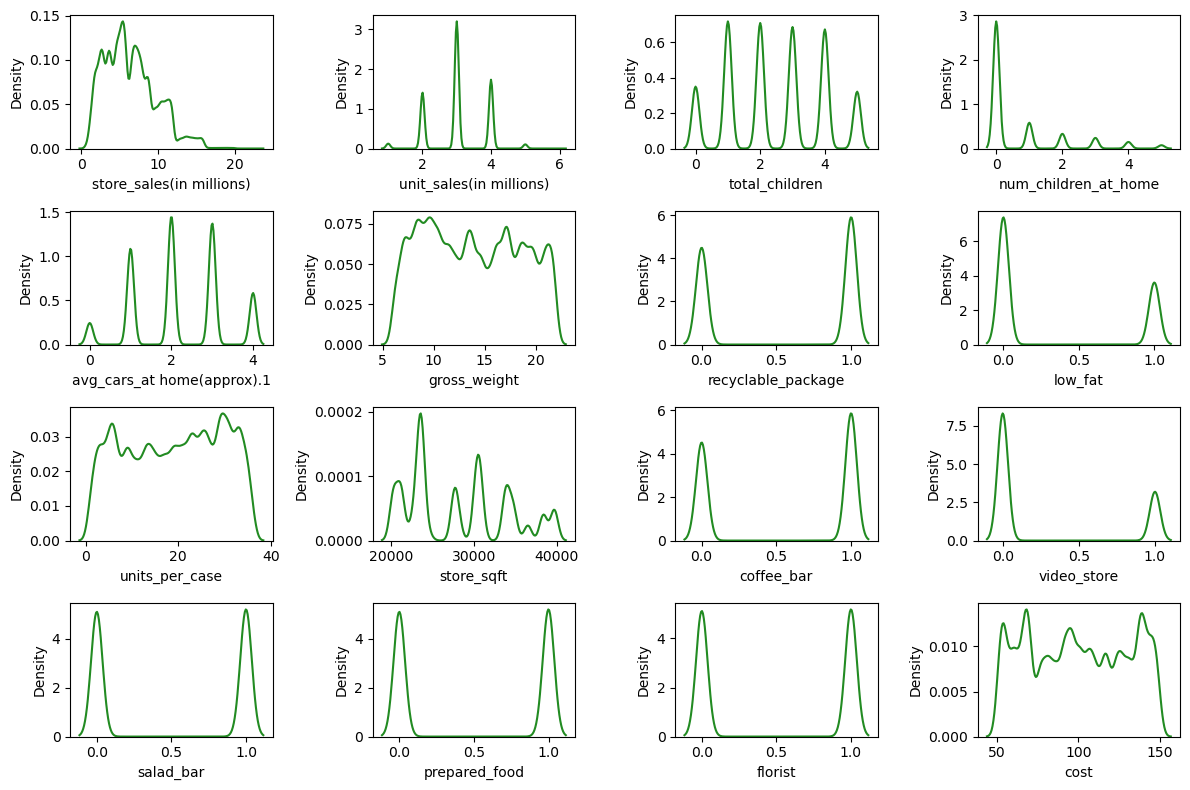

In [12]:
# Understanding the different variables with univariate analysis
plt.figure(figsize=(12,8))
for i in range(1, len(train_df.columns)):
    plt.subplot(4,4,i)
    sns.kdeplot(x=train_df[train_df.columns[i]], label='train', color='forestgreen')
    plt.tight_layout()

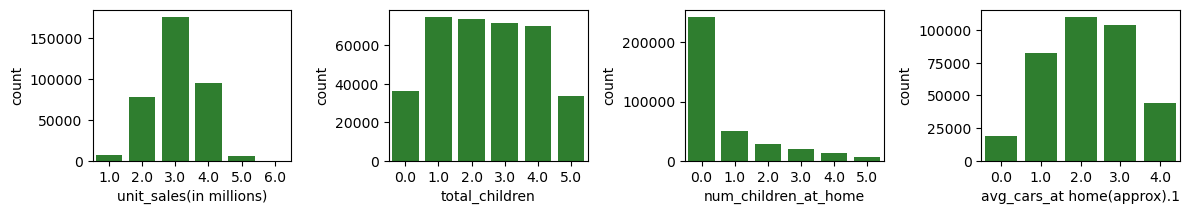

In [13]:
# distributions
cats = [train_df.columns[col] for col in [2,3,4,5,7,8,11,12,13,14,15]]
plt.figure(figsize=(12,6))
for i in range(0,len(cats[:4])):
    plt.subplot(3,4,i+1)
    sns.countplot(x=train_df[cats[i]], color='forestgreen')
    plt.tight_layout()

In [10]:
train_df.corr().cost.sort_values(ascending=False)

cost                          1.000000
avg_cars_at home(approx).1    0.027098
units_per_case                0.000180
gross_weight                 -0.000116
id                           -0.000611
recyclable_package           -0.001455
num_children_at_home         -0.001727
low_fat                      -0.001975
total_children               -0.007482
store_sales(in millions)     -0.012387
unit_sales(in millions)      -0.026509
store_sqft                   -0.049201
coffee_bar                   -0.052086
salad_bar                    -0.098810
prepared_food                -0.098843
video_store                  -0.106786
florist                      -0.110414
Name: cost, dtype: float64

In [11]:
features = ['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist']
target = 'cost'

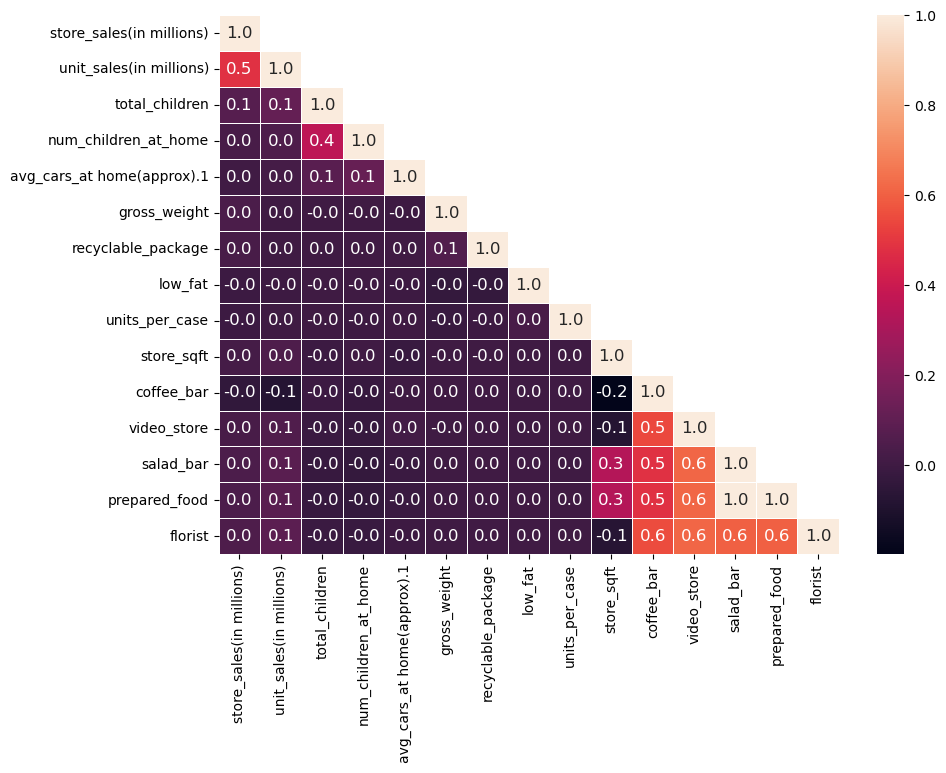

In [12]:
# checking for correlation between any of the values 
corr = train_df[features].corr(method='pearson')
triu = np.triu(corr)
np.fill_diagonal(triu, False)

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, fmt='.1f',annot_kws={"size":12}, linewidth=.6, mask=triu);

In [13]:
#Prepared food and salad bar seem to be correlated so will drop one of them from both datasets
train_df = train_df.drop(['salad_bar'], axis=1)
test_df = test_df.drop(['salad_bar'], axis=1)

In [14]:
#checking they're dropped
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  prepared_food 

In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240224 entries, 0 to 240223
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          240224 non-null  int64  
 1   store_sales(in millions)    240224 non-null  float64
 2   unit_sales(in millions)     240224 non-null  float64
 3   total_children              240224 non-null  float64
 4   num_children_at_home        240224 non-null  float64
 5   avg_cars_at home(approx).1  240224 non-null  float64
 6   gross_weight                240224 non-null  float64
 7   recyclable_package          240224 non-null  float64
 8   low_fat                     240224 non-null  float64
 9   units_per_case              240224 non-null  float64
 10  store_sqft                  240224 non-null  float64
 11  coffee_bar                  240224 non-null  float64
 12  video_store                 240224 non-null  float64
 13  prepared_food 

In [16]:
updated_feat = ['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'prepared_food', 'florist']

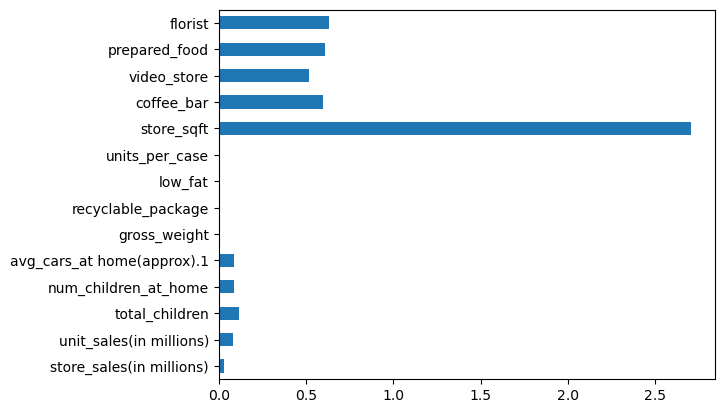

In [16]:
# Feature importance
from sklearn.feature_selection import mutual_info_regression

importances = mutual_info_regression(train_df[updated_feat], train_df[target])
feat_importances = pd.Series(importances, updated_feat[0:len(updated_feat)])
feat_importances.plot(kind='barh')
plt.show()

In [17]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, metrics
pre_process = preprocessing.StandardScaler()
X = pd.DataFrame(pre_process.fit_transform(train_df[updated_feat]))

In [18]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.687014,-0.055923,-0.306572,1.078931,-0.187968,-0.763214,0.871949,-0.698316,1.275573,1.395352,-1.139299,-0.619580,-1.009710,-1.006403
1,-0.404289,-1.330336,1.036621,-0.567525,0.734293,-1.551983,0.871949,-0.698316,-1.759805,0.004300,0.877733,-0.619580,-1.009710,-1.006403
2,2.340593,1.218490,-1.649764,-0.567525,0.734293,1.620428,0.871949,-0.698316,0.688080,-1.166944,0.877733,-0.619580,-1.009710,-1.006403
3,-0.700542,-0.055923,1.708217,-0.567525,-2.032491,0.211912,-1.146856,1.432016,1.667234,-1.166944,0.877733,-0.619580,-1.009710,-1.006403
4,-1.271889,-0.055923,1.708217,-0.567525,0.734293,0.688641,0.871949,1.432016,0.100588,-0.081478,0.877733,1.613996,0.990383,0.993637


In [19]:
#preparing testing data
X_test = test_df[updated_feat].copy()
X_test = pd.DataFrame(pre_process.fit_transform(X_test))
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.267941,1.221065,-0.977563,-0.565792,-0.182627,-0.655005,-1.141405,1.434843,-1.170683,-1.314867,-1.137757,-0.616881,-1.008898,-1.003637
1,0.165141,-1.333277,-0.305254,1.085237,0.738924,-1.150306,0.876113,-0.696940,-1.464335,0.951271,0.878922,-0.616881,0.991180,0.996377
2,0.600529,-0.056106,-1.649871,-0.565792,0.738924,-1.094071,-1.141405,1.434843,-0.485497,1.928427,-1.137757,-0.616881,0.991180,-1.003637
3,-0.264200,-1.333277,0.367054,1.910751,-0.182627,1.745801,0.876113,-0.696940,-0.974916,-0.750969,0.878922,1.621058,0.991180,0.996377
4,-0.469800,-0.056106,-0.305254,-0.565792,-0.182627,-0.633376,0.876113,-0.696940,-0.779148,-0.080450,0.878922,1.621058,0.991180,0.996377


In [20]:
#target variable
y = train_df[target]

In [21]:
# checking if shapes are same
X.shape, X_test.shape

((360336, 14), (240224, 14))

In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240224 entries, 0 to 240223
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          240224 non-null  int64  
 1   store_sales(in millions)    240224 non-null  float64
 2   unit_sales(in millions)     240224 non-null  float64
 3   total_children              240224 non-null  float64
 4   num_children_at_home        240224 non-null  float64
 5   avg_cars_at home(approx).1  240224 non-null  float64
 6   gross_weight                240224 non-null  float64
 7   recyclable_package          240224 non-null  float64
 8   low_fat                     240224 non-null  float64
 9   units_per_case              240224 non-null  float64
 10  store_sqft                  240224 non-null  float64
 11  coffee_bar                  240224 non-null  float64
 12  video_store                 240224 non-null  float64
 13  prepared_food 

In [23]:
# starting with a linear regression
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X, y)

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_squared_log_error


rmsle_scorer = make_scorer(mean_squared_log_error, greater_is_better=False)

scores = cross_validate(lin_reg, X, y, scoring=rmsle_scorer, cv=5, return_train_score=True)

def display_rmse_scores(scores):
#     rmse_scores =  np.sqrt(-scores)
    print("Training score:", (-scores['train_score'].mean())**0.5)
    print("Validation score:", (-scores['test_score'].mean())**0.5)
display_rmse_scores(scores)

Training score: 0.31692424914206857
Validation score: 0.31694414890280964


In [24]:
# not bad results but will try some other models
from sklearn.model_selection import train_test_split 

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

In [25]:
# Model dictionary
model_dict = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Light GBM': LGBMRegressor(),
    'XG Boost' : XGBRegressor()
}


In [26]:
def evaluation(model_str, y_pred, y_pred_train):
    results = {
        'model': model_str,
        'rmsle val': mean_squared_log_error(y_val, y_pred, squared=False),
        'rmsle train': mean_squared_log_error(y_train, y_pred_train, squared=False)
    }
    return results

In [27]:
# looping through all models and storing the results
result_list = []
for model in model_dict:
    model_dict[model].fit(X_train, y_train)
    y_pred = model_dict[model].predict(X_val)
    y_pred_train = model_dict[model].predict(X_train)
    result = evaluation(model, y_pred, y_pred_train)
    result_list.append(result)
df_eval = pd.DataFrame(result_list)
df_eval

,model,rmsle val,rmsle train
0,Decision Tree,0.420444,0.000053
1,Random Forest,0.309917,0.124087
2,Light GBM,0.303204,0.302174
3,XG Boost,0.302485,0.296965


In [28]:
# decision tree and random forest overfitted on the training data.
# XG Boost performed marginally better than LightGBM so proceeded with that.
result_list = {'Model' : [], 'rmsle test cv': [], 'rmsle train cv': []}
model = 'XG Boost'
score = cross_validate(model_dict[model], X, y, cv=5, scoring='neg_mean_squared_log_error', return_train_score=True)
ts = np.sqrt(abs(score['test_score'].mean()))
tr = np.sqrt(abs(score['train_score'].mean()))
result_list['Model'].append(model)
result_list['rmsle test cv'].append(ts)
result_list['rmsle train cv'].append(tr)
df_eval = pd.DataFrame(result_list)
df_eval

,Model,rmsle test cv,rmsle train cv
0,XG Boost,0.302395,0.297224


In [29]:
# Hyperparameter Tune - XG Boost - Media Campaign Cost Prediction

In [40]:
#tuning model
from sklearn.model_selection import GridSearchCV

# define XGBoost model
xgb_model = XGBRegressor(n_jobs=-1, objective='reg:squarederror')

# define parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X, y)

# print best hyperparameters
print(grid_search.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


KeyboardInterrupt: 

In [29]:
result_list_2 = {'Model' : [], 'rmsle test cv': [], 'rmsle train cv': []}
xgb_model = XGBRegressor(n_jobs=-1, objective='reg:squarederror', max_depth=7, learning_rate=0.1)
score = cross_validate(xgb_model, X, y, cv=5, scoring='neg_mean_squared_log_error', return_train_score=True)
ts = np.sqrt(abs(score['test_score'].mean()))
tr = np.sqrt(abs(score['train_score'].mean()))
result_list_2['Model'].append(model)
result_list_2['rmsle test cv'].append(ts)
result_list_2['rmsle train cv'].append(tr)
df_eval = pd.DataFrame(result_list_2)
df_eval

,Model,rmsle test cv,rmsle train cv
0,XG Boost,0.302227,0.299108


In [35]:
# Model may be overfitting on the training data 
# Adding increased regularization and early stopping to try improve
result_list = {'Model' : [], 'rmsle test cv': [], 'rmsle train cv': []}
model = 'XG Boost'

params = {
    'n_estimators': 1000,
    'max_depth': 5,
    'learning_rate': 0.1,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_lambda': 0.5, # add regularization
    'reg_alpha': 0.5 # add regularization
}

xgb_model = XGBRegressor(**params)

# set up early stopping
early_stopping_rounds = 10
eval_set = [(X_train, y_train), (X_val, y_val)]

xgb_model.fit(X_train, y_train, 
              eval_set=eval_set,
              eval_metric='rmsle',
              early_stopping_rounds=early_stopping_rounds,
              verbose=False)

eval_result = xgb_model.evals_result()
ts = np.sqrt(abs(eval_result['validation_1']['rmsle'][-1]))
tr = np.sqrt(abs(eval_result['validation_0']['rmsle'][-1]))


result_list['Model'].append(model)
result_list['rmsle test cv'].append(ts)
result_list['rmsle train cv'].append(tr)

df_eval = pd.DataFrame(result_list)

In [36]:
df_eval

,Model,rmsle test cv,rmsle train cv
0,XG Boost,0.552473,0.552503


In [31]:
# Looks the model may have gotten too complex and is now overfitting. 
# Implementing feature selection to try improve score.

from sklearn.feature_selection import SelectFromModel

# using the best performing instance of XGBRegressor
xgb_model = XGBRegressor(n_estimators=1000, max_depth=5, learning_rate=0.1, min_child_weight=1, subsample=0.8, 
                         colsample_bytree=0.8, reg_lambda=0.5, reg_alpha=0.5)

# fit the model on the training data
xgb_model.fit(X_train, y_train)

# create a SelectFromModel object using the trained model and a threshold value
selection = SelectFromModel(xgb_model, threshold='median', prefit=True)

# transform the training and validation sets to select features
X_train_selected = selection.transform(X_train)
X_val_selected = selection.transform(X_val)

# retrain the model on the selected features
xgb_model_selected = XGBRegressor(n_estimators=1000, max_depth=5, learning_rate=0.1, min_child_weight=1, subsample=0.8, 
                                   colsample_bytree=0.8, reg_lambda=0.5, reg_alpha=0.5)
xgb_model_selected.fit(X_train_selected, y_train)

# evaluate the model on the validation set
y_pred_val = xgb_model_selected.predict(X_val_selected)
val_rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred_val))
print("Validation RMSLE:", val_rmsle)


Validation RMSLE: 0.30329018148667136


In [33]:
#Happy with the above models performance, going to predict.
y_pred = xgb_model.predict(X_test)

# Create a submission file
submission = pd.DataFrame({
    'Id': test_df['id'],
    'SalePrice': y_pred
})

submission


,Id,SalePrice
0,360336,98.827110
1,360337,99.258453
2,360338,97.565735
3,360339,105.155540
4,360340,77.359444
...,...,...
240219,600555,106.156578
240220,600556,95.334663
240221,600557,99.961044
240222,600558,111.132874


In [34]:
submission.describe()

,Id,SalePrice
count,240224.00000,240224.000000
mean,480447.50000,99.618744
std,69346.83987,9.379976
min,360336.00000,29.341236
25%,420391.75000,93.978033
50%,480447.50000,99.922340
75%,540503.25000,105.485826
max,600559.00000,146.879242
